### example of QCL structure  
- Using meep to construct the QCL structure  
- By piling different materials on the geometry list  
- This is an enlarged image of the structure  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Ti,Au,GaAs

resolution = 50
sx = 12
sy = 5
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
padge_thickness = 0.08
ngaas_thickness = 0.1
ti_thickness = 0.02
au_thickness = 0.18
core_thickness = 2.5
substrate_thickness = 1.0

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)
qcl_core = mp.Medium(epsilon=13.0)
pdge = mp.Medium(epsilon=10.0)


geometry = []

# Substrate
geometry.append(mp.Block(
    material=si_gaas,
    size=mp.Vector3(mp.inf, substrate_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness/2)
))

# QCL active region
geometry.append(mp.Block(
    material=qcl_core,
    size=mp.Vector3(mp.inf, core_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness + core_thickness/2)
))

# 上层金属叠层
y0 = -sy/2 + substrate_thickness + core_thickness
geometry += [
    mp.Block(material = pdge, size = mp.Vector3(mp.inf, padge_thickness), center = mp.Vector3(y=y0 + padge_thickness/2)),
    mp.Block(material = GaAs, size = mp.Vector3(mp.inf, ngaas_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness/2)),
    mp.Block(material = Ti, size = mp.Vector3(mp.inf, ti_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness/2)),
    mp.Block(material = Au, size = mp.Vector3(mp.inf, au_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness + au_thickness/2))
]


# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(-3, -sy/2 + 0.5),
    size=mp.Vector3(0, 1.0)
)]

tran_fr = mp.FluxRegion(center=mp.Vector3(6))
frequencies = np.linspace(10,10,100)

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

sim.plot2D()


### QCL material structure
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- The parameter of thickness the epsilon should be changed  
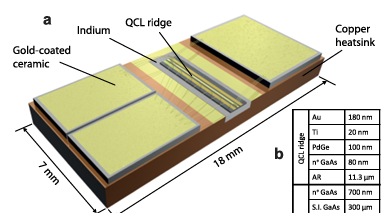

In [ ]:
import meep as mp
import numpy as np

# 各层厚度（单位：μm）
resolution = 50
sx = 700
sy = 350
sz = 120
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# 各层厚度（单位：μm）
au_thickness = 0.18
ti_thickness = 0.02
pdge_thickness = 0.1
ngaas_thickness_1 = 0.08
Ar_thickness = 0.0113
ngaas_thickness_2 = 0.7
sigaas_thickness = 300

# 材料定义（近似 ε = n^2）
au = mp.Medium(epsilon=9.5)
ti = mp.Medium(epsilon=6.0)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
Ar = mp.Medium(epsilon=13.0)
si_gaas = mp.Medium(epsilon=12.9,)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2)))

# 上层金属叠层
y0 = -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2)),
    mp.Block(material = ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2)),
    mp.Block(material = au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2 + au_thickness/2))
]
    
# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(0,0,0),
    size=mp.Vector3(0,4.0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)


sim.plot2D()

### Grating structure
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- The axis is redefined z->x y->y x->z  
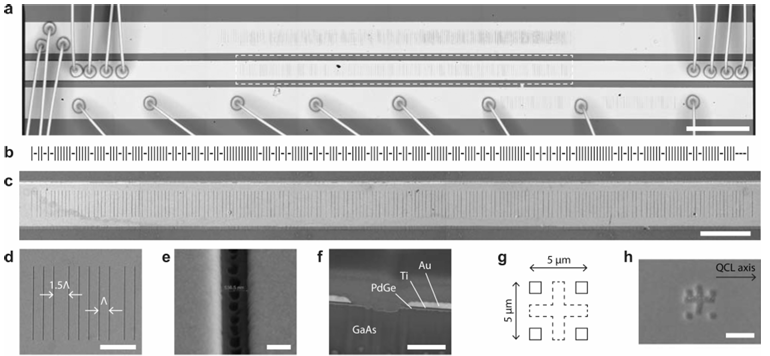

In [ ]:
import meep as mp

resolution = 50
sx = 12
sy = 10
sz = 30
cell = mp.Vector3(sx,sy,0)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
sigaas_thickness = 5

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

# 光栅参数
Λ = 0.5                    # 基本周期（μm）
slot_width = 0.1           # 槽宽（沿 X）
slot_depth = 5           # 镂刻深度（沿 Y）
slot_spacing = Λ / 2       # 间距
pattern = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式

# 起始 X 位置，居中布置
x_start = -len(pattern) * slot_spacing / 2

# 放置高度（y 方向中心）
y_grating = sy - slot_depth / 2 

# 光栅 geometry 列表
grating_geometry = []

# 构造光栅槽
for i, symbol in enumerate(pattern):
    if symbol == "|":
        x_pos = x_start + i * slot_spacing
        grating_geometry.append(mp.Block(
            material=mp.air,
            size=mp.Vector3(slot_width, slot_depth, sz),
            center=mp.Vector3(x_pos)
        ))

geometry += grating_geometry

sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    dimensions=2
)

sim.plot2D()

### Combine them
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- Episilon should be adjusted  
- Thickness should be adjusted  
- Basic length should be 1 um  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Ti,GaAs,Au

# basic setup (1 μm)
resolution = 50
sx = 100
sy = 350
sz = 1
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# thickness of different layers（1 μm）
au_thickness = 0.18
ti_thickness = 0.02
pdge_thickness = 0.1
ngaas_thickness_1 = 0.08
Ar_thickness = 0.0113
ngaas_thickness_2 = 0.7
sigaas_thickness = 300

# material definition
au = mp.Medium(epsilon=9.5)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
si_gaas = mp.Medium(epsilon=12.9)
Ar = mp.Medium(epsilon=13.0)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness + ngaas_thickness_2 + Ar_thickness/2)))

# upper layers
y0 = -sy/2 + sigaas_thickness + ngaas_thickness_2 + Ar_thickness
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y = y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness/2)),
    mp.Block(material = Ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness/2)),
    mp.Block(material = Au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness + au_thickness/2))
]
    
# grating parameters
Λ = 1                    # 基本周期（1μm）
slot_length = 1
slot_width = 1        
slot_depth = 0.18       
slot_spacing = Λ / 2
pattern_1 = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式
pattern_2 = "-|||||||-||-||-|||-||-|-||-|||-||-|-||||||-||-|-|||-||-|||||-|||"
pattern_3 = "-||-||-||-|||||-||||||-|||-||||-||-||-|||||||||-||-|-||-||-||-|-|||-||-||-|-||||||-||||||||-||-||||||-||||---|"
pattern = pattern_1 + pattern_2 + pattern_3


x_start = -len(pattern) * slot_spacing / 2
y_grating = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness + au_thickness/2

# grating list
grating_geometry = []

# setup grating list
for i, symbol in enumerate(pattern):
    if symbol == "|":
        x_pos = x_start + i * slot_spacing
        grating_geometry.append(mp.Block(
                                material=mp.air,
                                size=mp.Vector3(slot_width, slot_depth, sz),
                                center=mp.Vector3(x_pos,y_grating,0)
        ))

# add to original layers
geometry += grating_geometry

# Source
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.25),  # 单一频率，例如 λ = 4 μm
    component=mp.Ez,
    center=mp.Vector3(-50, y0),                # 放在结构左侧
    size=mp.Vector3(0, 1.0)                   # 在 y 方向均匀激发
)]

# 探测器位置（在光栅右侧）
detector_pos = mp.Vector3(50, y0)       # y0 是波导中轴高度
detector_size = mp.Vector3(0, 1.0)     # 沿 y 方向覆盖整个波导区域

# 添加 flux monitor，检测频率为 0.25

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

flux_monitor = sim.add_flux(
    0.25, 0, 1,                         # 中心频率、宽度为0（单点）、数量1
    mp.FluxRegion(center=detector_pos, size=detector_size)
)

sim.plot2D()

sim.run(until=50)

flux_val = mp.get_fluxes(flux_monitor)[0]
print("Detected flux at f=0.25:", flux_val)

### Single grating with shorter material
- the whole structure of the qcl is too large to simulate, so that here is a small example for us to analyze whether the source are in the right position  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Au
import matplotlib.pyplot as plt

# basic setup (1 μm)
resolution = 50
sx = 10
sy = 10
sz = 1
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(0.1)]

# thickness of different layers（1 μm）
Au_thickness = 9

geometry = []

# QCL active region
geometry.append(mp.Block(
                    material=Au,
                    size=mp.Vector3(sx, Au_thickness,sz),
                    center=mp.Vector3(y = 0)))

# Source
sources = [mp.Source(
            src=mp.GaussianSource(frequency=1000, fwidth=1),
            component=mp.Ex,
            center=mp.Vector3(-5,0,0),
            size=mp.Vector3(1,9,0))]


# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)
sim.plot2D()

## 探测器位置（在光栅右侧）
detector_pos = mp.Vector3(5, 0)       # y0 是波导中轴高度
detector_size = mp.Vector3(0, 9)     # 沿 y 方向覆盖整个波导区域
flux_monitor = sim.add_flux(1000, 5, 100, mp.FluxRegion(center=detector_pos, size=detector_size))

sim.run(until = 50)


In [ ]:
frequencies = mp.get_flux_freqs(flux_monitor)
flux_data = mp.get_fluxes(flux_monitor)

plt.figure(figsize=(8, 4))
plt.plot(frequencies, flux_data, marker='o', color='blue', label='Spectral Flux')

# 添加标签和标题
plt.xlabel('Frequency (1/μm)', fontsize=12)
plt.ylabel('Flux Intensity (a.u.)', fontsize=12)
plt.title('Spectral Response at Detector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 示例：沿 y 方向，从 y=-3 到 y=+3，固定 x=0
y_vals = np.linspace(-5, 5, 500)
ex_vals = []

for y in y_vals:
    pt = mp.Vector3(0, y)  # x=0, y=varies
    ex_vals.append(sim.get_field_point(mp.Ex, pt))

plt.figure(figsize=(6,4))
plt.plot(y_vals, ex_vals, label='Ex along y-axis at x=0', color='blue')
plt.xlabel("y (μm)")
plt.ylabel("Ex Field")
plt.title("Field Distribution Along y-axis")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()